# **Machine Learning I Regression Project**

# Notebook Structure

## 1. Data Preparation and Exploratory Data Analysis (EDA)
- Prepare and clean the dataset.
- Perform exploratory data analysis to identify patterns, trends, and potential outliers.

## 2. Building Models
- Develop predictive models using machine learning algorithms.
- Train and evaluate the models to ensure optimal performance.

## 3. Comparing Results
- Compare the performance metrics of the models.
- Analyze the results to draw meaningful conclusions.

## 1. Data Preparation and Exploratory Data Analysis (EDA)

In [45]:
# Importing the libraries

# Data manipulation and visualization
import pandas as pd  # Used for data manipulation
import seaborn as sns  # Used for data visualization
import matplotlib.pyplot as plt  # Used for data visualization

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler # Used for data preprocessing
from sklearn.pipeline import Pipeline  # Used for data preprocessing

# Model training and selection
from sklearn.model_selection import train_test_split, GridSearchCV  # Used for data splitting and hyperparameter tuning

# Machine learning models
from sklearn.linear_model import LinearRegression  # Used for regression as base model
from sklearn.neighbors import KNeighborsRegressor  # Used for regression
from sklearn.tree import DecisionTreeRegressor  # Used for regression

# Model evaluation
from sklearn.metrics import ( mean_squared_error, r2_score)  # Used for model evaluation


In [25]:
# Load the data
data = pd.read_csv("/Users/elgun/Desktop/Machine_Learning_Project/data/regression.csv")
display(data.head()) # Display the first 5 rows of the data

No Property_Type  Land_Area  Floor_Area  Condition         View  \
0            1         Condo       1784        1555        New          NaN   
1            2     Farmhouse       1768        1530        New    City View   
2            3     Apartment       2667        2667        Old  Park Facing   
3            4     Apartment       1262        1262        Old    City View   
4            5     Apartment       1720        1720  Renovated    City View   
...        ...           ...        ...         ...        ...          ...   
499995  499996         Condo       3815        2060  Renovated    City View   
499996  499997         Villa       6514        4525        Old    City View   
499997  499998     Apartment       2587        2587        Old    City View   
499998  499999     Apartment       2897        2897        Old          NaN   
499999  500000         Condo       3898        1986  Renovated          NaN   

                 Amenities Furnishing_Status Air_Conditioning (Yes/No)  \
0                    Basic   Fully Furnished                        No   
1                    Basic    Semi Furnished                        No   
2           Rooftop Access   Fully Furnished                       Yes   
3                      NaN    Semi Furnished                       Yes   
4                  Parking    Semi Furnished                       Yes   
...                    ...               ...                       ...   
499995               Basic    Semi Furnished                       Yes   
499996  Gym, Swimming Pool    Semi Furnished                       Yes   
499997      Rooftop Access    Semi Furnished                       Yes   
499998      Rooftop Access    Semi Furnished                       Yes   
499999               Basic    Semi Furnished                       Yes   

       Heating (Yes/No)  ...       Location Num_bathrooms  Num_rooms    Price  \
0                   Yes  ...        Phoenix             3          2   334126   
1                   Yes  ...  San Francisco             2          3  1895788   
2                    No  ...          Miami             2          3  4397494   
3                    No  ...        Chicago             3          4  1367842   
4                    No  ...       New York             4          6  1403758   
...                 ...  ...            ...           ...        ...      ...   
499995               No  ...         Boston             3          4   549973   
499996               No  ...  San Francisco             4          6  8464858   
499997               No  ...         Denver             5          3  3475517   
499998               No  ...         Boston             4          5  1616638   
499999               No  ...         Boston             3          3   718263   

        distance to nearest MRT Station distance to nearest Hospital  \
0                                  7.06                        11.83   
1                                  3.96                        14.28   
2                                 14.08                         0.92   
3                                 14.17                        14.21   
4                                  6.09                         8.50   
...                                 ...                          ...   
499995                             8.48                        17.41   
499996                            13.31                         3.16   
499997                             8.51                        14.24   
499998                             7.24                        10.08   
499999                            13.32                         7.71   

        distance to nearest School  distance to nearest Bus Stand  \
0                             3.54                           2.67   
1                             1.02                           1.21   
2                             4.94                           0.62   
3                             7.13                          

In [29]:
# Separate target and features
target_column = 'Price'
X = data.drop(columns=[target_column, 'No'])
y = data[[target_column]]  # Ensure y is a DataFrame for scaling

# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['number']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Encode categorical columns using LabelEncoder
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Define preprocessing for numerical data
X_preprocessor = Pipeline(steps=[
    ('scale', MinMaxScaler())
])

# Define scaler for the target variable
y_scaler = MinMaxScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling to numerical columns in X
X_train[numerical_columns] = X_preprocessor.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = X_preprocessor.transform(X_test[numerical_columns])

# Scale the target variable y
y_train = pd.DataFrame(y_scaler.fit_transform(y_train), columns=[target_column], index=y_train.index)
y_test = pd.DataFrame(y_scaler.transform(y_test), columns=[target_column], index=y_test.index)


Summary statistics of the dataset:


No      Land_Area     Floor_Area  Maintenance_Fees  \
count  500000.000000  500000.000000  500000.000000     500000.000000   
mean   250000.500000    4124.896648    2326.954952        303.431346   
std    144337.711635    3349.107572    1534.688648        202.728801   
min         1.000000     800.000000       0.000000          0.000000   
25%    125000.750000    1946.000000    1235.000000        169.000000   
50%    250000.500000    3033.000000    2103.000000        270.000000   
75%    375000.250000    4993.000000    2961.000000        416.000000   
max    500000.000000   20000.000000    9490.000000       1000.000000   

            Latitude      Longitude  Num_bathrooms      Num_rooms  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean       37.311516     -98.872206       2.994360       4.305154   
std         6.213226      18.899258       1.698684       2.123215   
min        25.261717    -122.919382       0.000000       0.000000   
25%        33.452485    -118.245102       2.000000       3.000000   
50%        38.269711    -104.499100       3.000000       4.000000   
75%        41.867570     -80.201614       4.000000       6.000000   
max        48.106200     -70.559041       7.000000      10.000000   

              Price  distance to nearest MRT Station  \
count  5.000000e+05                    500000.000000   
mean   2.945870e+06                         7.752000   
std    2.778550e+06                         4.187235   
min    2.400000e+05                         0.500000   
25%    1.035060e+06                         4.130000   
50%    1.965798e+06                         7.750000   
75%    3.951216e+06                        11.380000   
max    1.999754e+07                        15.000000   

       distance to nearest Hospital  distance to nearest School  \
count                 500000.000000               500000.000000   
mean                      10.251818                    5.250775   
std                        5.634280                    2.743490   
min                        0.500000                    0.500000   
25%                        5.380000                    2.870000   
50%                       10.240000                    5.250000   
75%                       15.130000                    7.630000   
max                       20.000000                   10.000000   

       distance to nearest Bus Stand  distance to nearest Airport  \
count                  500000.000000                500000.000000   
mean                        2.549711                    27.509618   
std                         1.414027                    12.992188   
min                         0.100000                     5.000000   
25%                         1.320000                    16.260000   
50%                         2.550000                    27.500000   
75%                         3.780000                    38.760000   
max                         5.000000                    50.000000   

       Crimerate in area  
count      500000.000000  
mean            7.199771  
std             2.307742  
min             1.200000  
25%             6.000000  
50%             8.000000  
75%             9.000000  
max            10.000000


Missing values in the dataset:


No                                      0
Property_Type                           0
Land_Area                               0
Floor_Area                              0
Condition                               0
View                               145019
Amenities                           80172
Furnishing_Status                   39709
Air_Conditioning (Yes/No)               0
Heating (Yes/No)                        0
Kitchen_Type                        39709
Balcony (Yes/No)                        0
Maintenance_Fees                        0
Latitude                                0
Longitude                               0
Location                                0
Num_bathrooms                           0
Num_rooms                               0
Price                                   0
distance to nearest MRT Station         0
distance to nearest Hospital            0
distance to nearest School              0
distance to nearest Bus Stand           0
distance to nearest Airport       

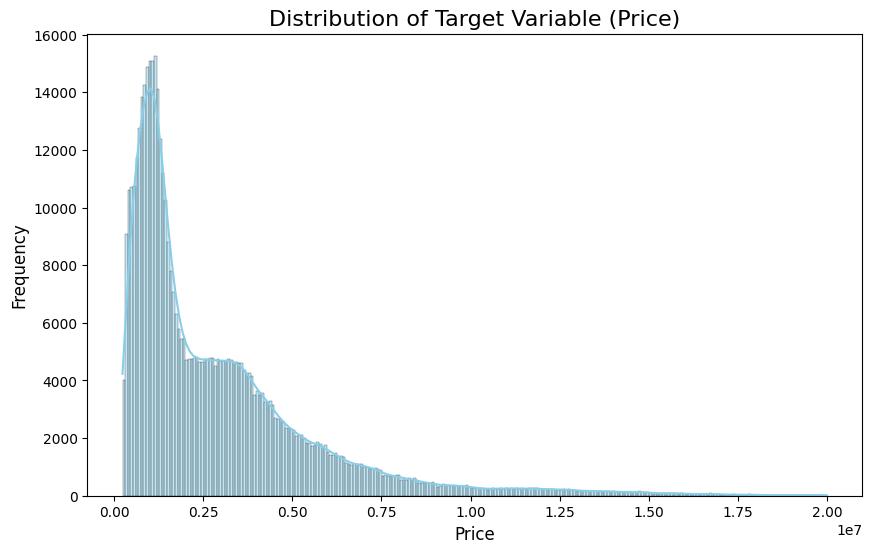

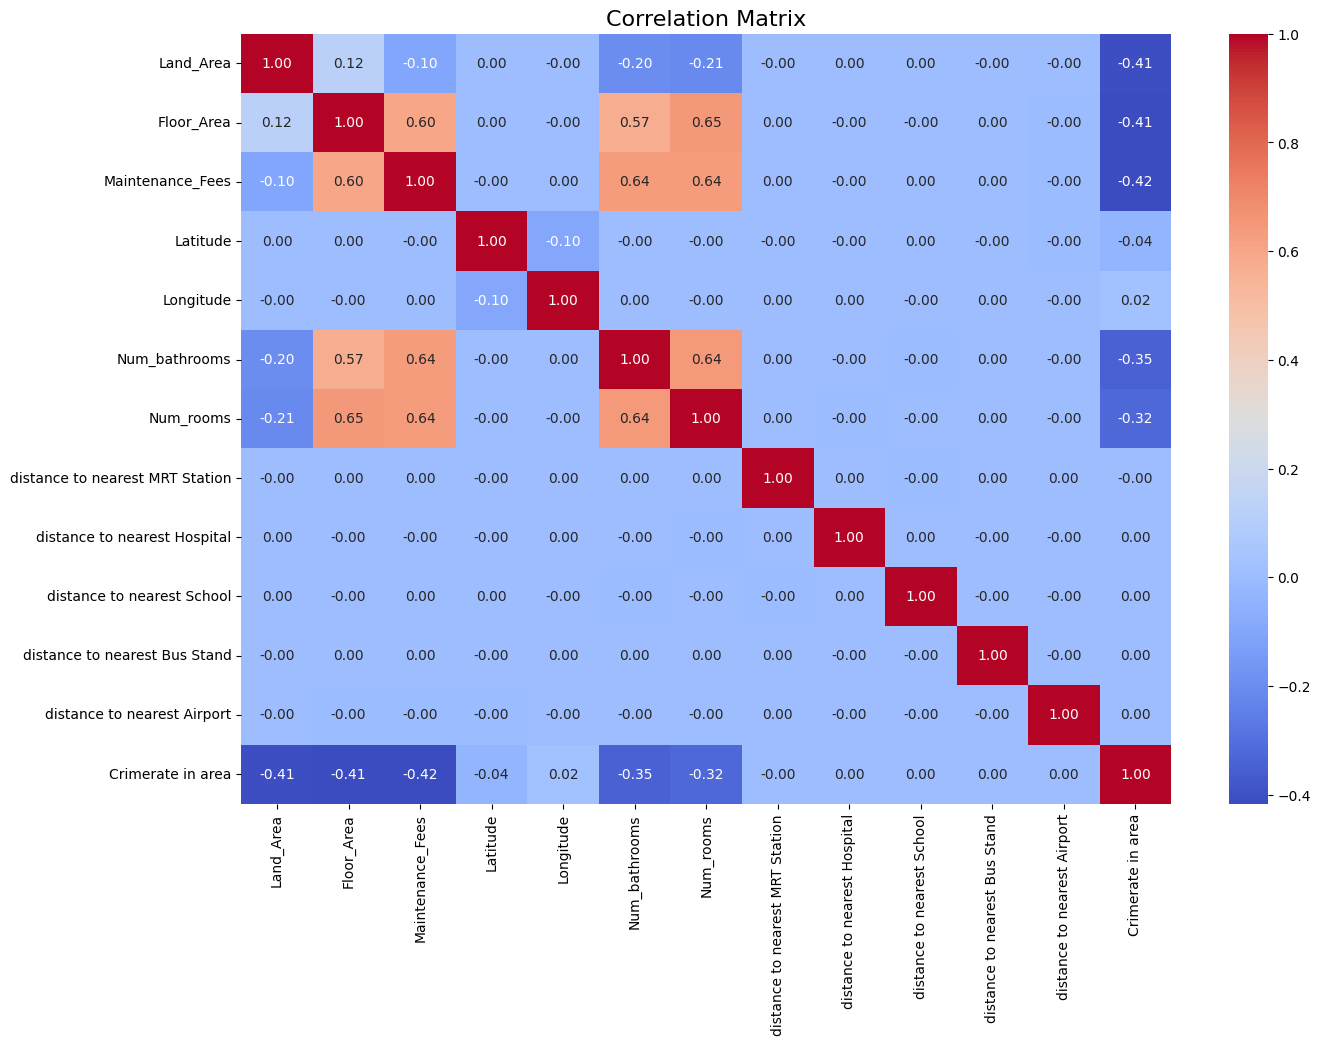

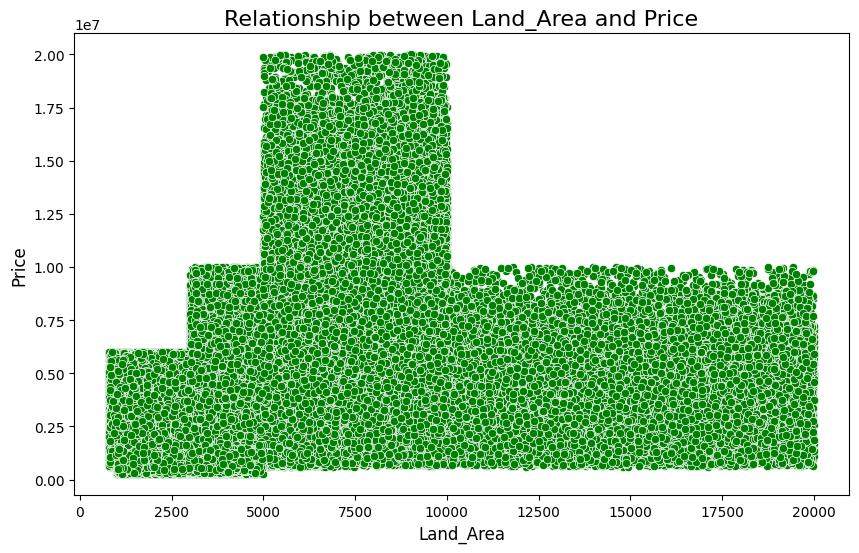

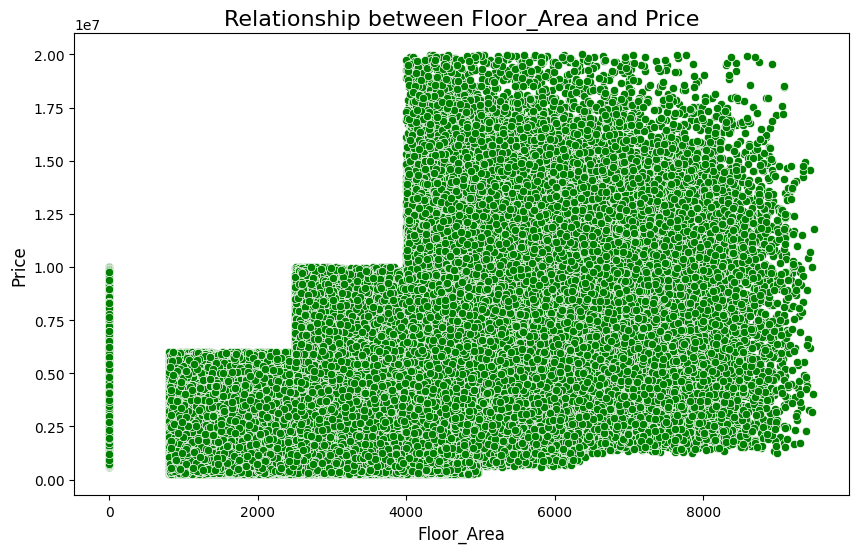

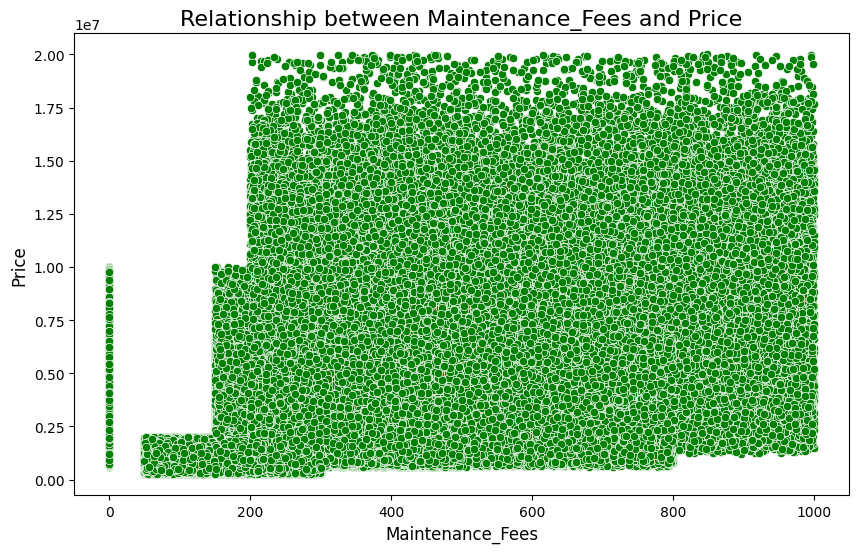

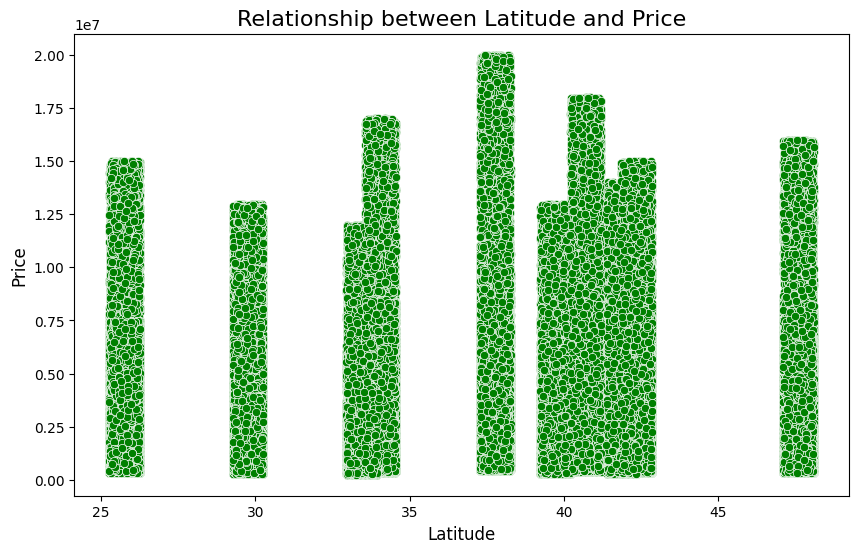

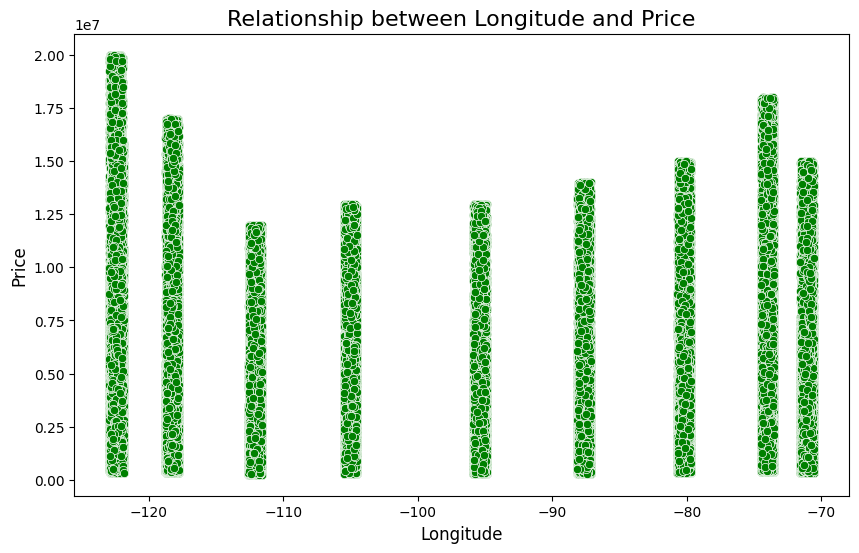

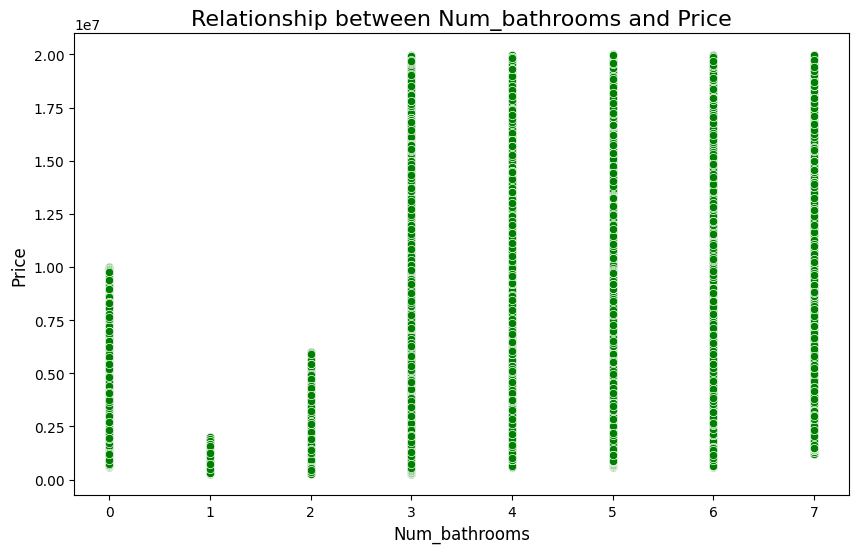

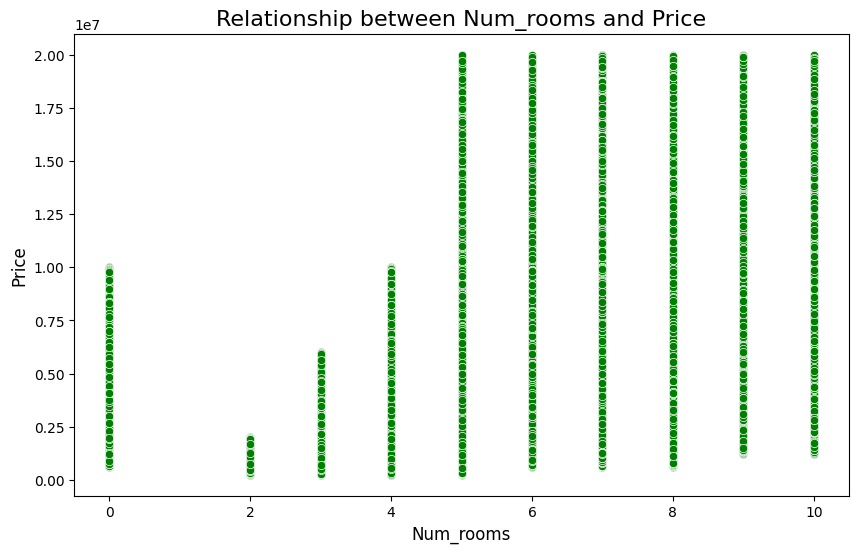

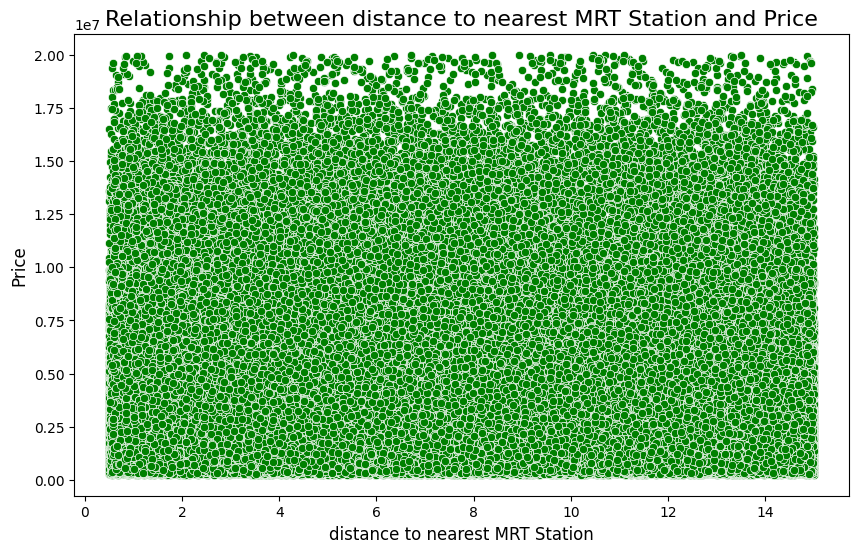

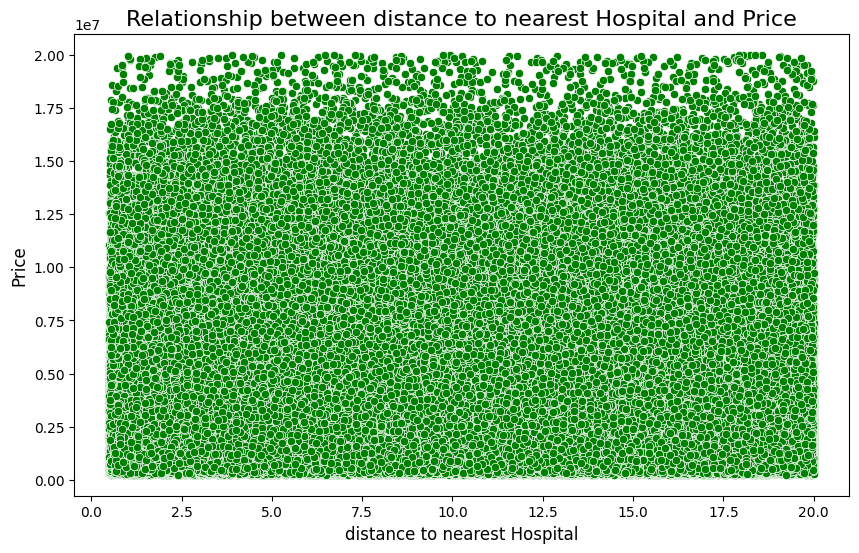

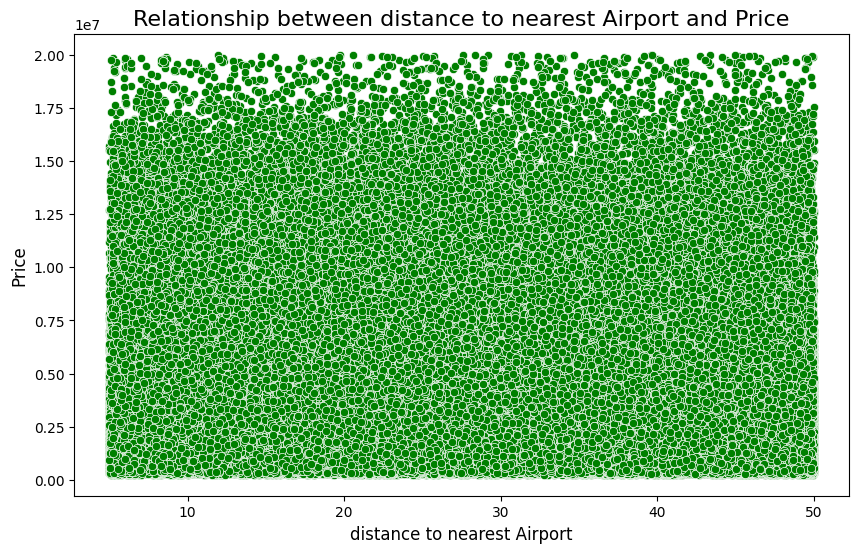

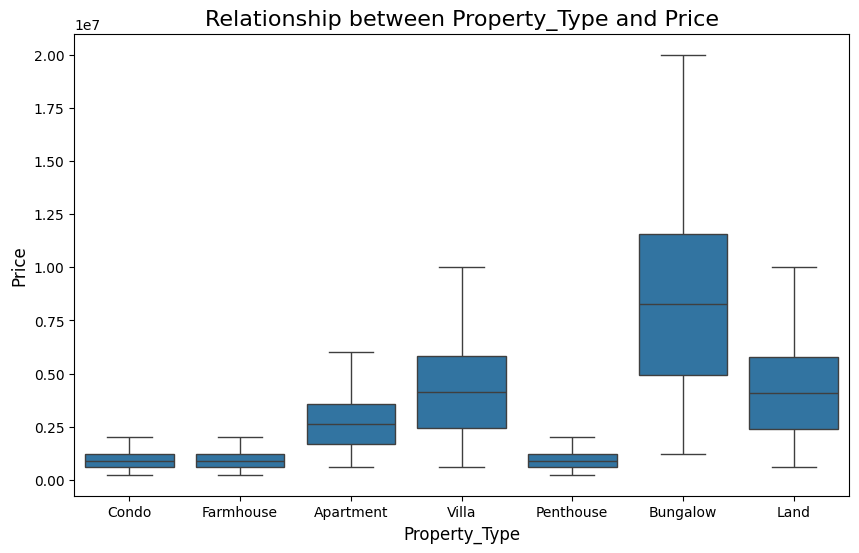

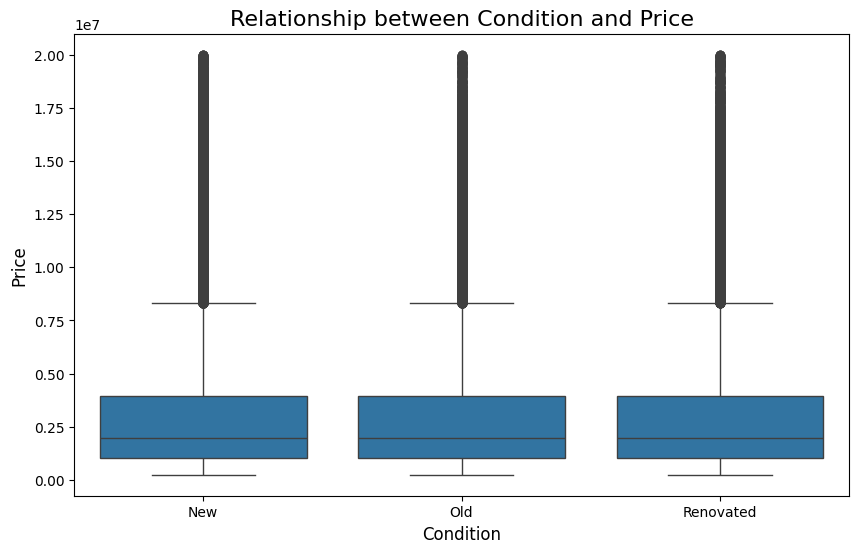

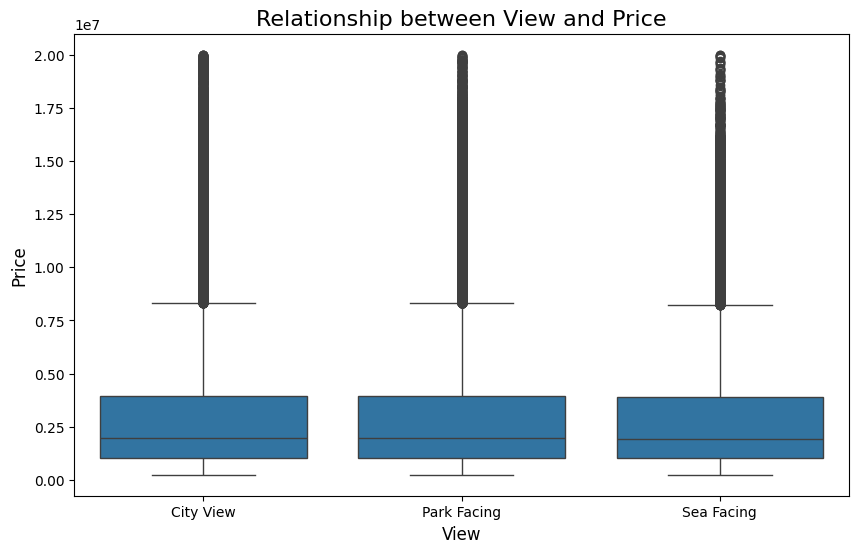

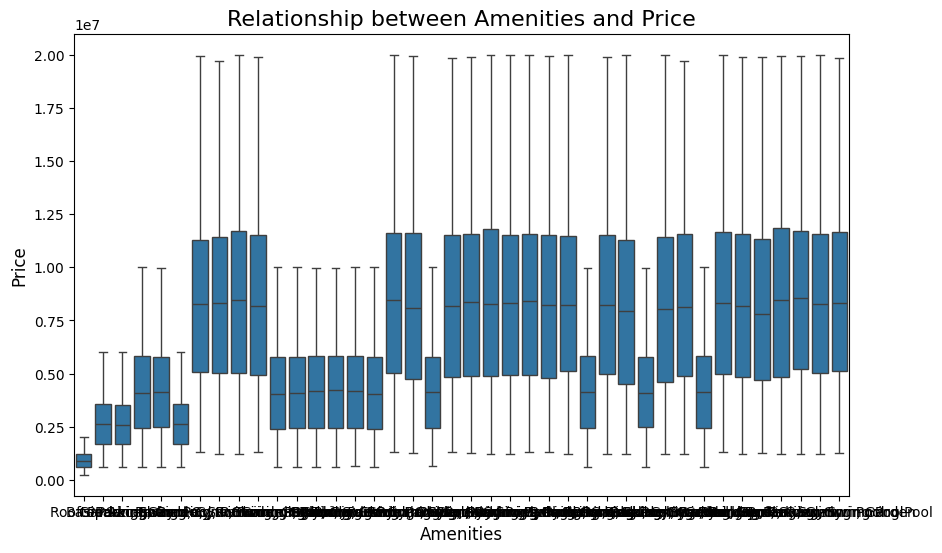

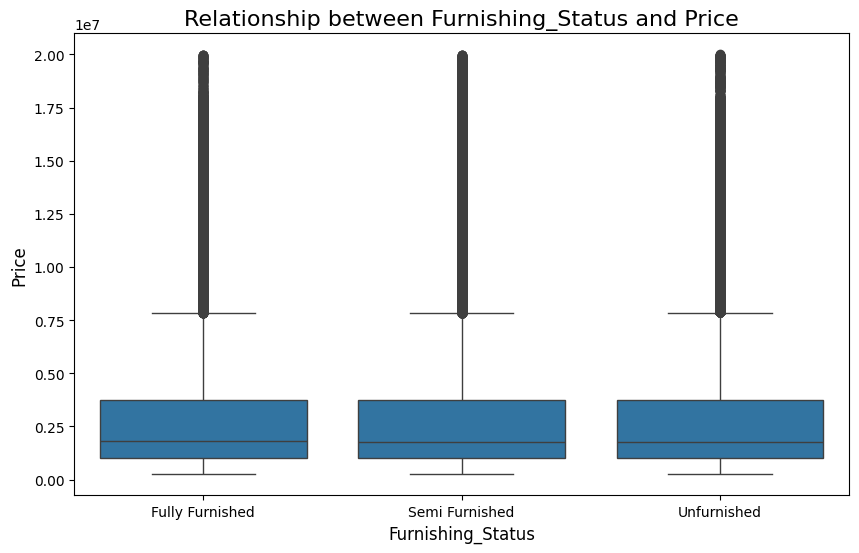

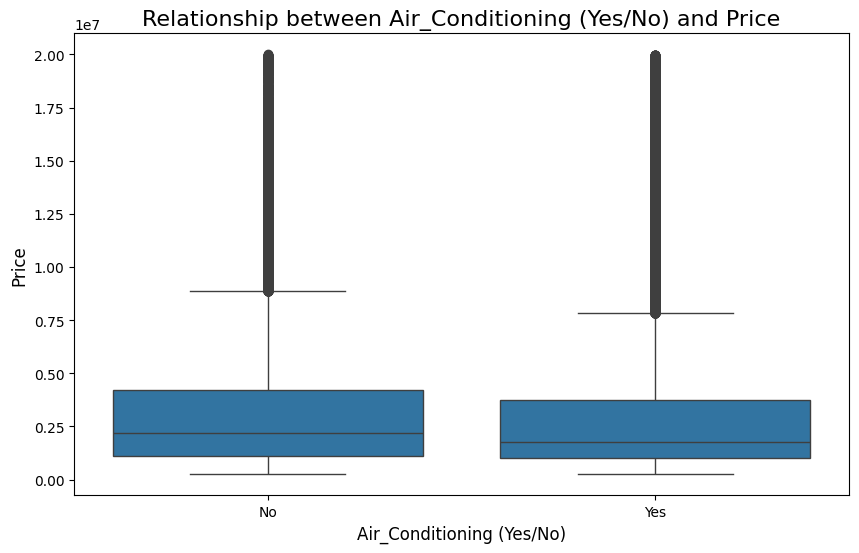

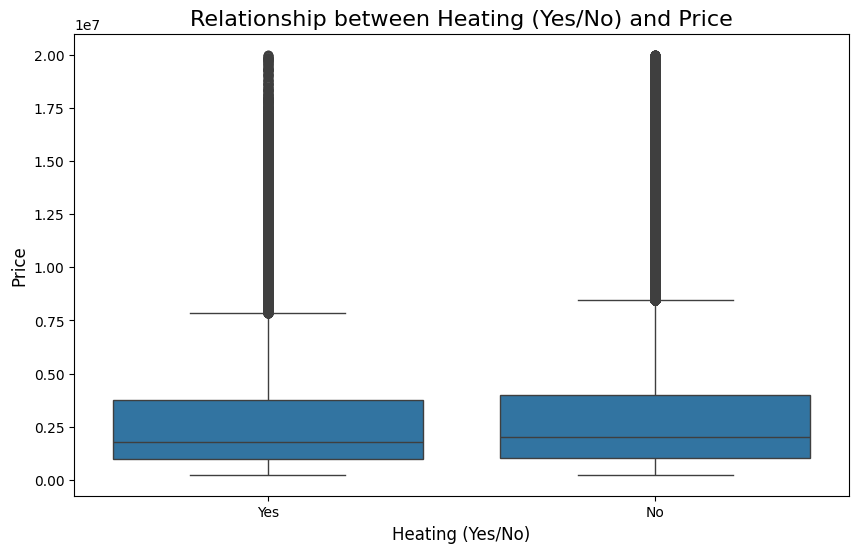

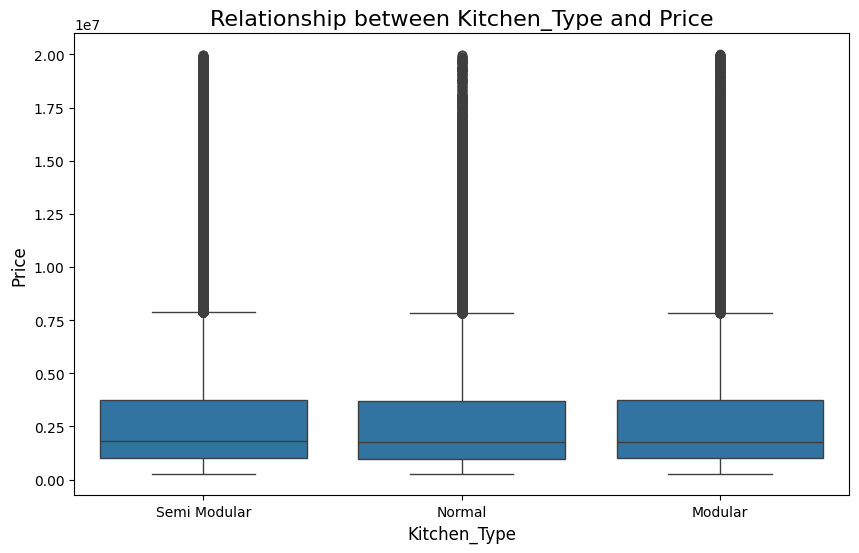

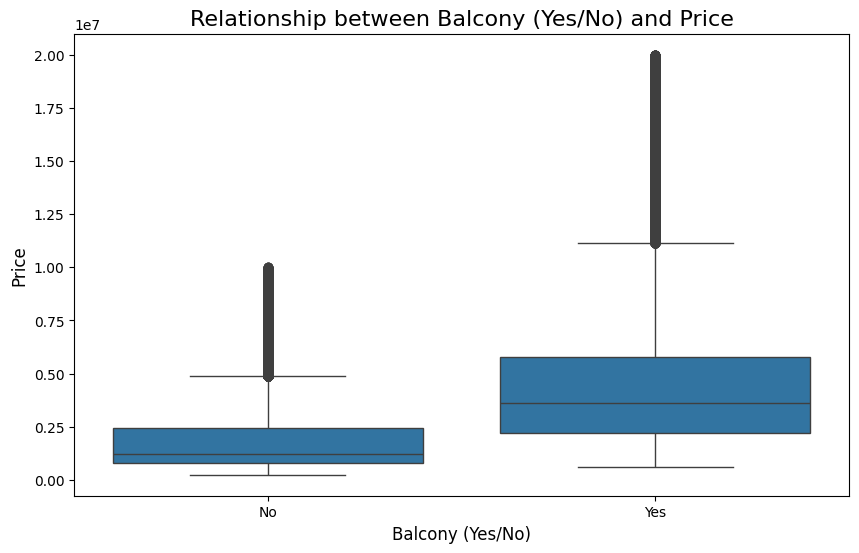

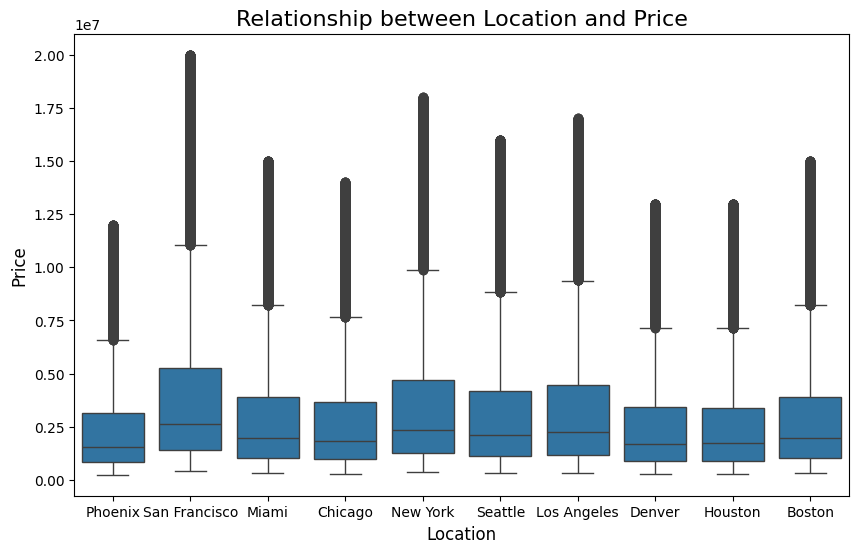

In [30]:
# Display missing values
print("\nMissing values in the dataset:")
display(data.isnull().sum())

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data[target_column], kde=True, color='skyblue')
plt.title('Distribution of Target Variable (Price)', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

def plot_relationships(columns, plot_type):
    """Helper function to plot relationships."""
    for col in columns:
        plt.figure(figsize=(10, 6))
        if plot_type == 'scatter':
            sns.scatterplot(x=data[col], y=data[target_column], color='green')
        elif plot_type == 'box':
            sns.boxplot(x=data[col], y=data[target_column])  # Removed palette
        plt.title(f'Relationship between {col} and {target_column}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel(target_column, fontsize=12)
        plt.show()


# Plot numerical relationships
plot_relationships(numerical_columns, plot_type='scatter')

# Plot categorical relationships
plot_relationships(categorical_columns, plot_type='box')


## 2. Building Models

# **Linear Regression**

In [41]:
# Initialize the LinearRegression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions using the testing data
y_pred_lr = model.predict(X_test)


# Decision Tree

In [42]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Train the best model
best_model.fit(X_train, y_train)
y_pred_dt = best_model.predict(X_test)




Best Parameters: {'max_depth': 7, 'min_samples_split': 5}


# K Neighbors Regression

In [35]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [5],
    'weights': ['distance'],
    'p': [1]  # Minkowski distance metric: 1 for Manhattan, 2 for Euclidean
}

# Initialize the KNeighborsRegressor
knn_regressor = KNeighborsRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=knn_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

print("Best Parameters for KNN:", best_params)

# Make predictions using the testing data
y_pred_knn = best_knn_model.predict(X_test)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for KNN: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Mean Squared Error (Best KNN): 0.00508389865650741
R^2 Score (Best KNN): 0.7409019786129414


## 3. Comparing Results

# Performance Metrics for Linear Regression

When evaluating the performance of a linear regression model, two commonly used metrics are **Mean Squared Error (MSE)** and **$R^2$ (Coefficient of Determination)**. Below is an explanation of these metrics:

---

## 1. Mean Squared Error (MSE)

The Mean Squared Error measures the average squared difference between the actual and predicted values. It provides insight into the magnitude of the error.

### Formula:
$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$

### Components:
- $n$: Number of data points
- $y_i$: Actual value of the $i$-th observation
- $\hat{y}_i$: Predicted value of the $i$-th observation

### Key Points:
- Lower $MSE$ indicates a better fit of the model to the data.
- $MSE$ is sensitive to outliers because it squares the errors.

---

## 2. Coefficient of Determination ($R^2$)

The $R^2$ metric indicates how well the model explains the variance in the target variable. It measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

### Formula:
$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$

### Components:
- $SS_{\text{res}} = \sum_{i=1}^n (y_i - \hat{y}_i)^2$: Residual sum of squares
- $SS_{\text{tot}} = \sum_{i=1}^n (y_i - \bar{y})^2$: Total sum of squares
- $\bar{y}$: Mean of the actual values

### Key Points:
- $R^2$ ranges from 0 to 1:
  - $R^2 = 1$: Perfect fit.
  - $R^2 = 0$: The model does not explain any variance.
- Negative $R^2$: Occurs when the model performs worse than simply predicting the mean of the target variable.

---

## Summary Table

| Metric  | Formula | Interpretation |
|---------|---------|----------------|
| **MSE** | $ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $ | Measures average squared error. Lower is better. |
| **$R^2$** | $ 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}} $ | Explains variance proportion. Higher is better. |

---

Using these metrics together provides a robust evaluation of your linear regression model, assessing both the accuracy of predictions (via $MSE$) and the goodness-of-fit (via $R^2$).


In [43]:
# Performce metrics

# Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_lr)
r2_linear = r2_score(y_test, y_pred_lr)

# Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


In [44]:
# Create a DataFrame to store the performance metrics
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'K Neighbors'],
    'Mean Squared Error': [mse_linear, mse_dt, mse_knn],
    'R^2 Score': [r2_linear, r2_dt, r2_knn]
})

# Display the results
display(results)

# Identify the model with the best performance based on R^2 Score
best_model_index = results['R^2 Score'].idxmax()
best_model_name = results.loc[best_model_index, 'Model']
best_model_r2 = results.loc[best_model_index, 'R^2 Score']

print(f"The model with the best performance is {best_model_name} with an R^2 Score of {best_model_r2:.4f}")

Model  Mean Squared Error  R^2 Score
0  Linear Regression            0.001570   0.920011
1      Decision Tree            0.000661   0.966310
2        K Neighbors            0.005084   0.740902

The model with the best performance is Decision Tree with an R^2 Score of 0.9663


# Conclusion: Model Comparison 

## Model Performance Comparison

The table below summarizes the performance of three regression models: **Linear Regression**, **Decision Tree**, and **K-Nearest Neighbors (KNN)**, based on their **Mean Squared Error (MSE)** and **$R^2$ Score**.

| Model             | Mean Squared Error | R² Score   |
|-------------------|--------------------|------------|
| **Linear Regression** | 0.001570           | 0.920011   |
| **Decision Tree**      | 0.000661           | 0.966310   |
| **K Neighbors**        | 0.005084           | 0.740902   |

### Key Findings:
1. **Best Performing Model:**
   - The **Decision Tree** model achieved the best performance with the lowest **Mean Squared Error (MSE)** of **0.000661** and the highest **$R^2$ Score** of **0.9663**, indicating excellent predictive power.

2. **K-Nearest Neighbors (KNN) Performance:**
   - The **KNN** model, with **$k=5$ neighbors**, had a **Mean Squared Error (MSE)** of **0.005084** and an **$R^2$ Score** of **0.7409**, which is lower compared to both Linear Regression and Decision Tree models.
   - Additionally, the **computation time** for the KNN model was significant, taking around **7 minutes** to complete the grid search and predictions, reflecting the high computational complexity associated with KNN, particularly as the dataset grows.

### Considerations:
- While **KNN** can still be valuable for smaller datasets or when interpretability is crucial, its **long computation time** and relatively poorer predictive performance (compared to Decision Tree) make it less favorable in this case.
- The **Decision Tree** model not only provided the best performance but also proved to be faster than KNN, making it a more suitable choice for this regression problem.

In conclusion, for optimal performance and efficiency, the **Decision Tree** model is recommended, with **KNN** requiring careful consideration for datasets with large computational overhead.
